# Tutorial for Wavelet Transform

### In this tutorial we will learn about the Fourier Transform and its limitation and also see how those limitations are overcome by Wavelet Transform

## Fourier Transform

### Fourier Transform consists of multiplying the signal with sines and cosines of different frequencies to match and scan for those frequencies in the data. The general idea behind the method is that any arbitrary signal can be constructed using an infinite sum of sines and cosines.
## $F(\tau, \omega) = \int^\infty_{-\infty} f(t) e^{-i \omega t} dt$

In [1]:
#Importing the required libraries. 
from modwt import modwt, modwtmra # modwt.py file
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as mplstyle
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.fft import fft, fftfreq
import pywt
from Wavelet2Go import Wavelet2Go

mplstyle.use('dark_background') # dark theme for plots

In [2]:
pi = np.pi
t_n = 1
N = 1000
T = t_n/N   # sampling period
fs = 1 / T # number of sample points for 1 second
frequencies = [10, 30, 60, 90] # synthetic signal frequencies

t1 = np.linspace(0, t_n, num=N) #time array

sig1 = np.sin(2*pi*frequencies[0]*t1) 
sig2 = np.sin(2*pi*frequencies[1]*t1)
sig3 = np.sin(2*pi*frequencies[2]*t1) 
sig4 = np.sin(2*pi*frequencies[3]*t1) 
#generate signal using superposition
signal1 = sig1 + sig2 + sig3 + sig4


t2 = np.linspace(0, t_n/4, num=int(N/4))

sig1 = np.sin(2*pi*frequencies[0]*t2) 
sig2 = np.sin(2*pi*frequencies[1]*t2)
sig3 = np.sin(2*pi*frequencies[2]*t2) 
sig4 = np.sin(2*pi*frequencies[3]*t2) 
# generate signal by concatenation
signal2 = np.concatenate([sig1, sig2, sig3, sig4])

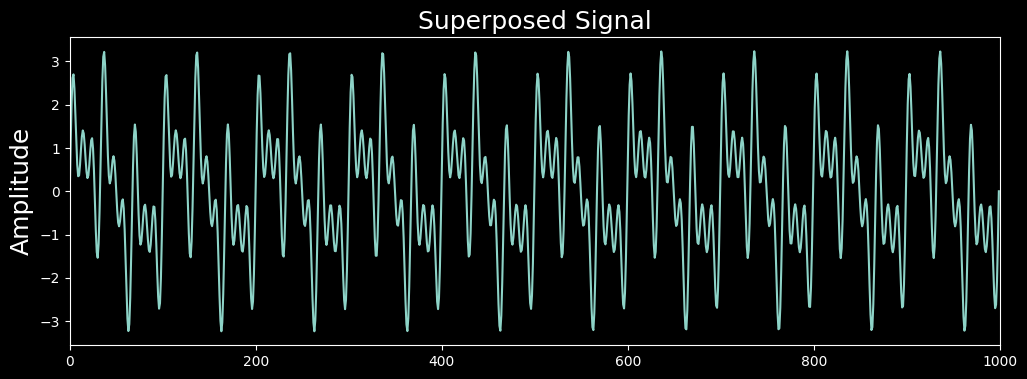

In [3]:
#plot of signal1
plt.figure(figsize=(12,4))
plt.xlim(0,1000)
plt.plot(signal1)
plt.ylabel('Amplitude', fontsize = '18')
plt.title('Superposed Signal', fontsize = '18')
#plt.savefig('/home/mujahid/code/plots/signal-superpose.jpeg')
plt.show()

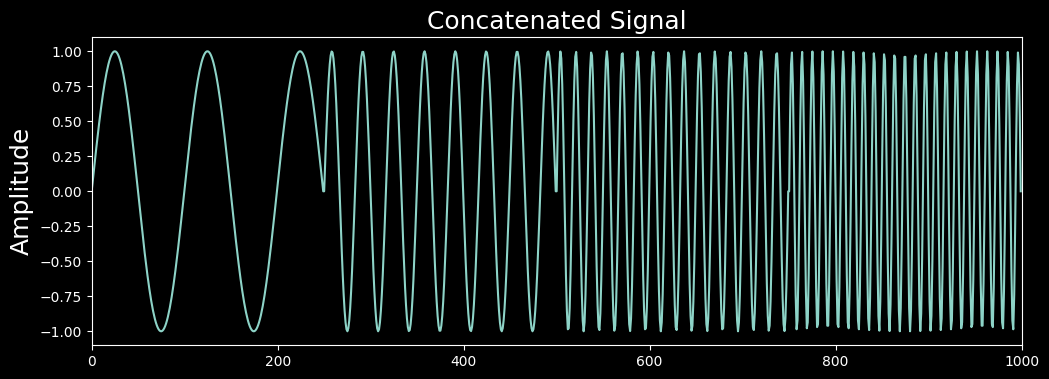

In [5]:
#plot of signal2
plt.figure(figsize=(12,4))
plt.xlim(0,1000)
plt.plot(signal2)
plt.ylabel('Amplitude', fontsize = '18')
plt.title('Concatenated Signal', fontsize = '18')
#plt.savefig('/home/mujahid/code/plots/signal-concat.jpeg')
plt.show()

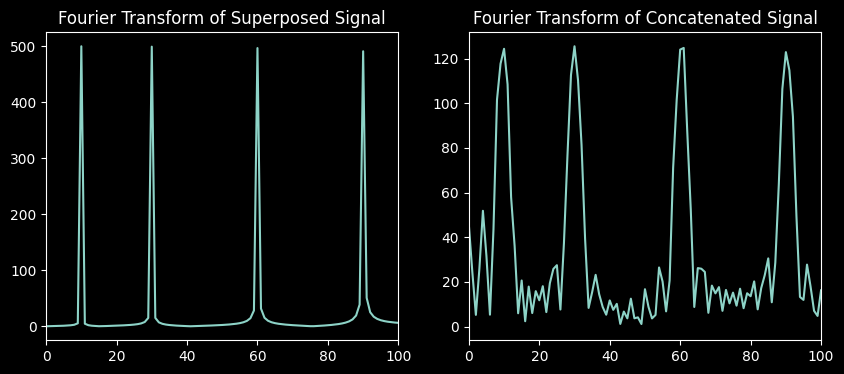

In [6]:
# FFT of the signal1
signal1_fft = fft(signal1)
freqs1 = fftfreq(len(signal1), 1/fs)
# FFT of the signal2
signal2_fft = fft(signal2)
freqs2 = fftfreq(len(signal2), 1/fs)

fig, ax = plt.subplots(1,2, figsize = (10,4))
ax[0].plot(np.abs(signal1_fft))
ax[0].set_title('Fourier Transform of Superposed Signal')
ax[1].plot(np.abs(signal2_fft))
ax[1].set_title('Fourier Transform of Concatenated Signal')
ax[0].set_xlim(0,100)
ax[1].set_xlim(0,100)
# Plot the second subplot on the right
#plt.savefig('/home/mujahid/code/plots/signal1_fft.jpeg')
plt.show()

### From the above plots of FFT of the two different signals, we can see that both signals have almost same profile in the freqency domain. There is no time information about when those frequencies happened. To overcome this, wavelets can be used.

## Wavelet Transform

### In Wavelet Transform, the sine and cosine or their complex form is localized in time and that function is convoluted throughout the signal to obtain both the time and frequecny information. 
# $T(a,b) =  \frac{1}{\sqrt a} \int_{-\infty}^\infty x(t) \psi^* \frac{(t - b)}{a} dt$
### here a is the scale parameter and b is the translation parameter. Scale parameter a decides the frequency, greater the scale 'a', lower the frequency it represents.
### Here is an example of a complex Morlet Wavelet.
# $\psi(t) = A e^{i\omega_0 t} \cdot e^{\frac{-t^2}{2}}$

In [7]:
wav = pywt.ContinuousWavelet("cmor1.5-1.0")

In [8]:
# Integrate psi wavelet function from - infinity to x
# using the rectangle integration method
int_psi, x = pywt.integrate_wavelet(wav, precision=10)
int_psi /= np.abs(int_psi).max()
wav_filter: np.ndarray = int_psi[::-1]

nt: int = len(wav_filter)
t: np.ndarray = np.linspace(-nt // 2, nt // 2, nt)

Text(0.5, 1.0, 'Complex Morlet Wavelet')

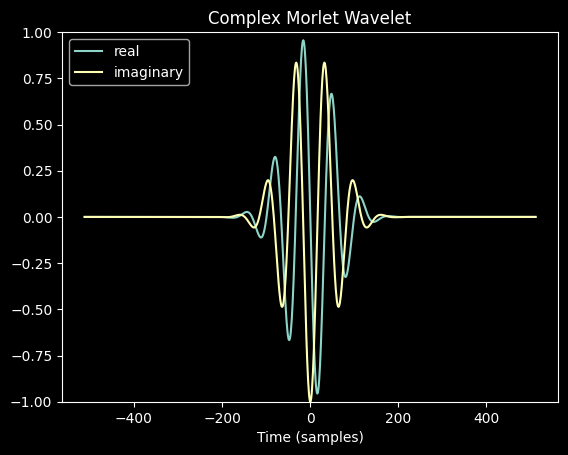

In [9]:
plt.plot(t, wav_filter.real)
plt.plot(t, wav_filter.imag)
plt.ylim([-1, 1])
plt.legend(["real", "imaginary"], loc="upper left")
plt.xlabel("Time (samples)")
plt.title("Complex Morlet Wavelet") 

### There are two types of wavelet transforms, Continuous and Discrete. In continuous wavelet transform, the scale parameter is varied smoothly and tranlated over the signal. We get a smooth 2d plot known as scaleogram which shows the time frequency components.

## Continuous Wavelet Transform (CWT)

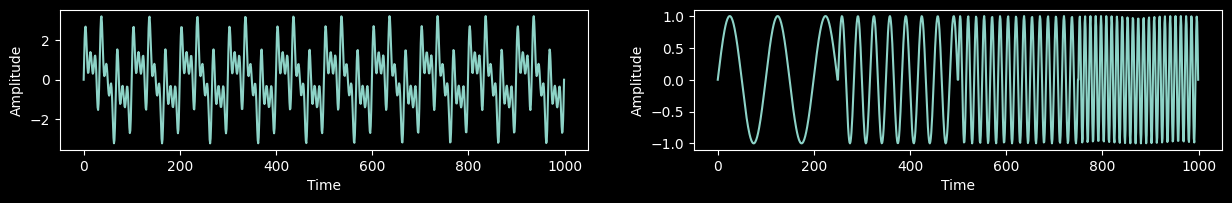

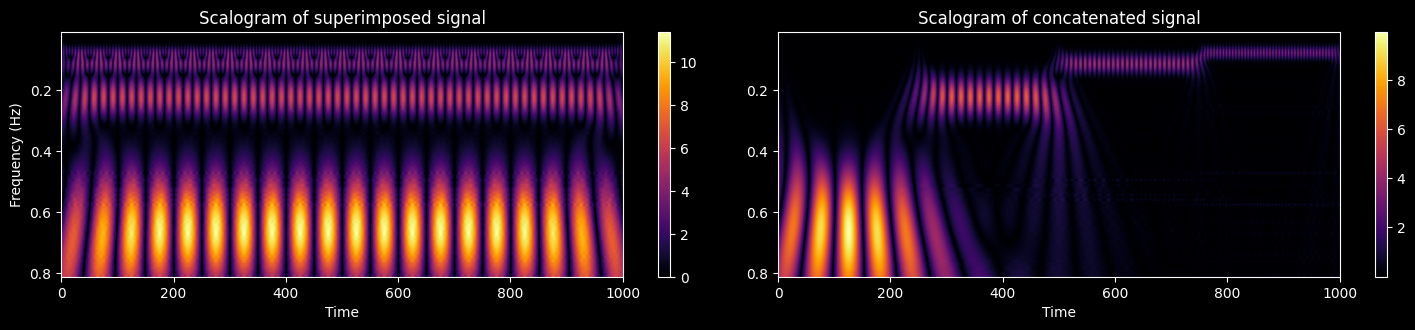

In [10]:

# Define the wavelet transform parameters
wavelet = 'morl'  # Choose a wavelet (e.g., Morlet)
scales = np.arange(1, 101)  # Scale range for the scalogram

# Compute the Continuous Wavelet Transform for both signals
cwt_signal1, frequencies_signal1 = pywt.cwt(signal1, scales, wavelet)
cwt_signal2, frequencies_signal2 = pywt.cwt(signal2, scales, wavelet)

plt.figure(figsize=(15, 4))
plt.subplot(2,2,1)
plt.plot(signal1)
plt.title('')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2,2,2)
plt.plot(signal2)
plt.title('')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Create a figure and plot the scalogram of signal 1
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 3)
plt.imshow(np.abs(cwt_signal1), extent=[0, len(signal1), frequencies_signal1[0], frequencies_signal1[-1]], aspect='auto', cmap='inferno')
plt.title('Scalogram of superimposed signal')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar()

# Plot the scalogram of signal 2
plt.subplot(2, 2, 4)
plt.imshow(np.abs(cwt_signal2), extent=[0, len(signal2), frequencies_signal2[0], frequencies_signal2[-1]], aspect='auto', cmap='inferno')
plt.title('Scalogram of concatenated signal')
plt.xlabel('Time')
#plt.ylabel('Frequency (Hz)')
plt.colorbar()

plt.tight_layout()
plt.show()


### From the above plots, we can clearly differentiate the signals using the CWT method. Next we will look into what discrete wavelet trasnform is.

## Discrete Wavelet Transform
### IN discrete wavelet transform, the scaling paraneter a is incremented in the powers of 2. Doing this, the mathamatics perfectly describe signal decomposition using filter banks. At the each level of decomposition, the frequencies present in the signal are divided by 2.
# $\phi_{j,k} (t) = \frac{1}{\sqrt{2^j}}\phi\frac{(t-k)}{2^j} $
### We will carry out discrete level decomposition on the synthetic data and plot them here.

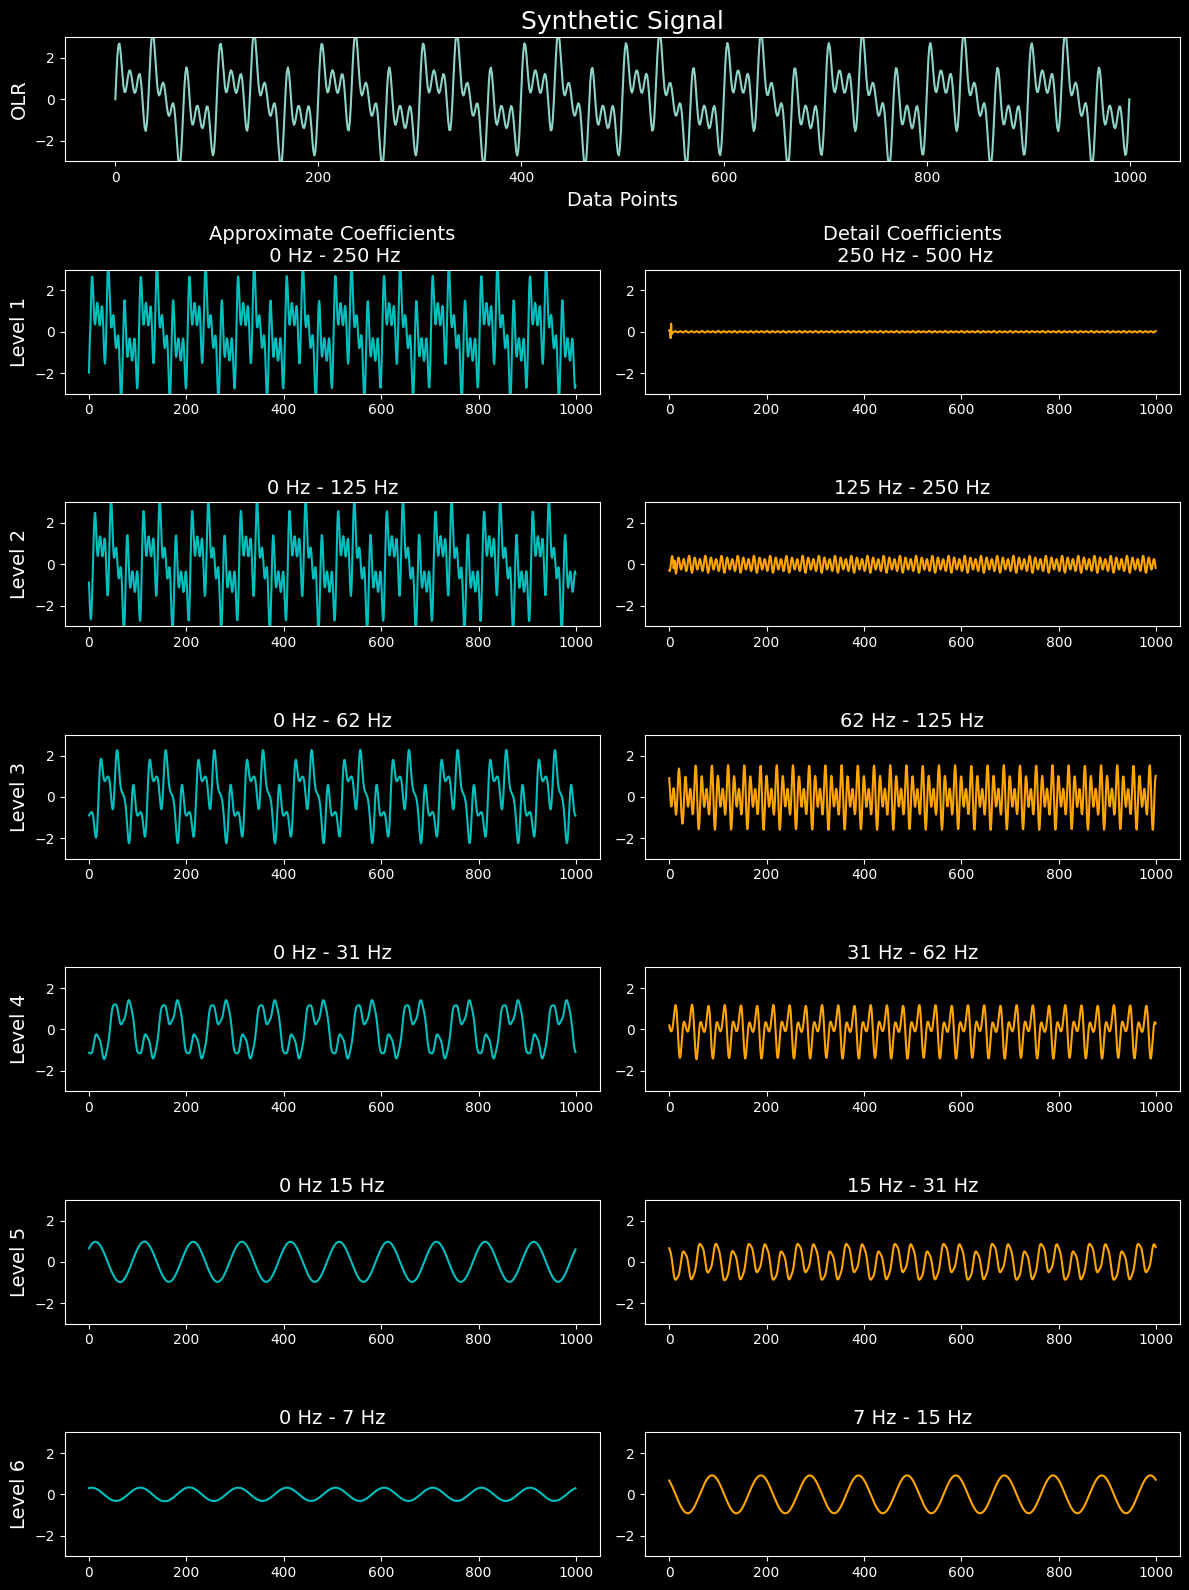

In [11]:

lev = 6

gs = gridspec.GridSpec(7, 2, height_ratios=[2, 2, 2, 2, 2, 2, 2])
fig = plt.figure(figsize=(12, 16))
detail, apprx = modwt(signal1, 'sym4', lev)

# Add plots to the figure
ax1 = fig.add_subplot(gs[0, :])  # First row spans both columns
ax2 = fig.add_subplot(gs[1, 0])  # Second row, first column
ax3 = fig.add_subplot(gs[1, 1])  # Second row, second column
ax4 = fig.add_subplot(gs[2, 0])  # third row, first column
ax5 = fig.add_subplot(gs[2, 1])  # third row, second column
ax6 = fig.add_subplot(gs[3, 0])  # fourth row, first column
ax7 = fig.add_subplot(gs[3, 1])  # fourth row, second column
ax8 = fig.add_subplot(gs[4, 0])  # fifth row, first column
ax9 = fig.add_subplot(gs[4, 1])  # fifth row, second column
ax10 = fig.add_subplot(gs[5, 0])  # sixth row, first column
ax11 = fig.add_subplot(gs[5, 1])  # sixth row, second column6
ax12 = fig.add_subplot(gs[6,0])
ax13 = fig.add_subplot(gs[6,1])
# Plot some data
ax1.plot(signal1, label='First Row')
ax2.plot(apprx[0], label='Second Row 1', color = 'c')
ax3.plot(detail[0], label='Second Row 2', color = 'orange')
ax4.plot(apprx[1], label='third Row 1', color = 'c')
ax5.plot(detail[1], label='third Row 2', color = 'orange')
ax6.plot(apprx[2], label='fourth Row 1', color = 'c')
ax7.plot(detail[2], label='fourth Row 2', color = 'orange')
ax8.plot(apprx[3], label='fifth Row 1', color = 'c')
ax9.plot(detail[3], label='fifth Row 2', color = 'orange')
ax10.plot(apprx[4], label='fifth Row 1', color = 'c')
ax11.plot(detail[4], label='fifth Row 2', color = 'orange')
ax12.plot(apprx[5], label='sixth row 1', color = 'c')
ax13.plot(detail[5], label='sixth row 2', color = 'orange')

# Set labels and titles
ax1.set_xlabel('Data Points', fontsize = '14')
ax1.set_ylabel('OLR', fontsize = '14')
ax1.set_title('Synthetic Signal', fontsize = '18')


ax1.set_ylim(-3,3)
ax2.set_ylim(-3,3)
ax3.set_ylim(-3,3)
ax4.set_ylim(-3,3)
ax5.set_ylim(-3,3)
ax6.set_ylim(-3,3)
ax7.set_ylim(-3,3)
ax8.set_ylim(-3,3)
ax9.set_ylim(-3,3)
ax10.set_ylim(-3,3)
ax11.set_ylim(-3,3)
ax12.set_ylim(-3,3)
ax13.set_ylim(-3,3)


# Set labels for other plots if needed
ax2.set_title('Approximate Coefficients\n 0 Hz - 250 Hz', fontsize = '14')
ax3.set_title('Detail Coefficients\n 250 Hz - 500 Hz', fontsize = '14')
ax4.set_title('0 Hz - 125 Hz', fontsize = '14')
ax5.set_title('125 Hz - 250 Hz', fontsize = '14')
ax6.set_title('0 Hz - 62 Hz', fontsize = '14')
ax7.set_title('62 Hz - 125 Hz', fontsize = '14')
ax8.set_title('0 Hz - 31 Hz', fontsize = '14')
ax9.set_title('31 Hz - 62 Hz', fontsize = '14')
ax10.set_title('0 Hz 15 Hz', fontsize = '14')
ax11.set_title('15 Hz - 31 Hz', fontsize = '14')
ax12.set_title('0 Hz - 7 Hz', fontsize = '14')
ax13.set_title('7 Hz - 15 Hz', fontsize = '14')
 

ax2.set_ylabel('Level 1', fontsize = '14')
ax4.set_ylabel('Level 2', fontsize = '14')
ax6.set_ylabel('Level 3', fontsize = '14')
ax8.set_ylabel('Level 4', fontsize = '14')
ax10.set_ylabel('Level 5', fontsize = '14')
ax12.set_ylabel('Level 6', fontsize = '14')
# Add legends
# Adjust spacing between plots
plt.tight_layout()
#plt.savefig('OLR-north-pacific-ocean.jpeg')
# Show the figure
#plt.savefig('/home/mujahid/code/plots/synthetic.jpeg')
plt.show()

### We can see from this, the decomposition of the frequencies from the signal into detail and approximate coefficients. To further understand this clearly, we will carry out Fourier Transform on the individual decomposed signals and compare them.

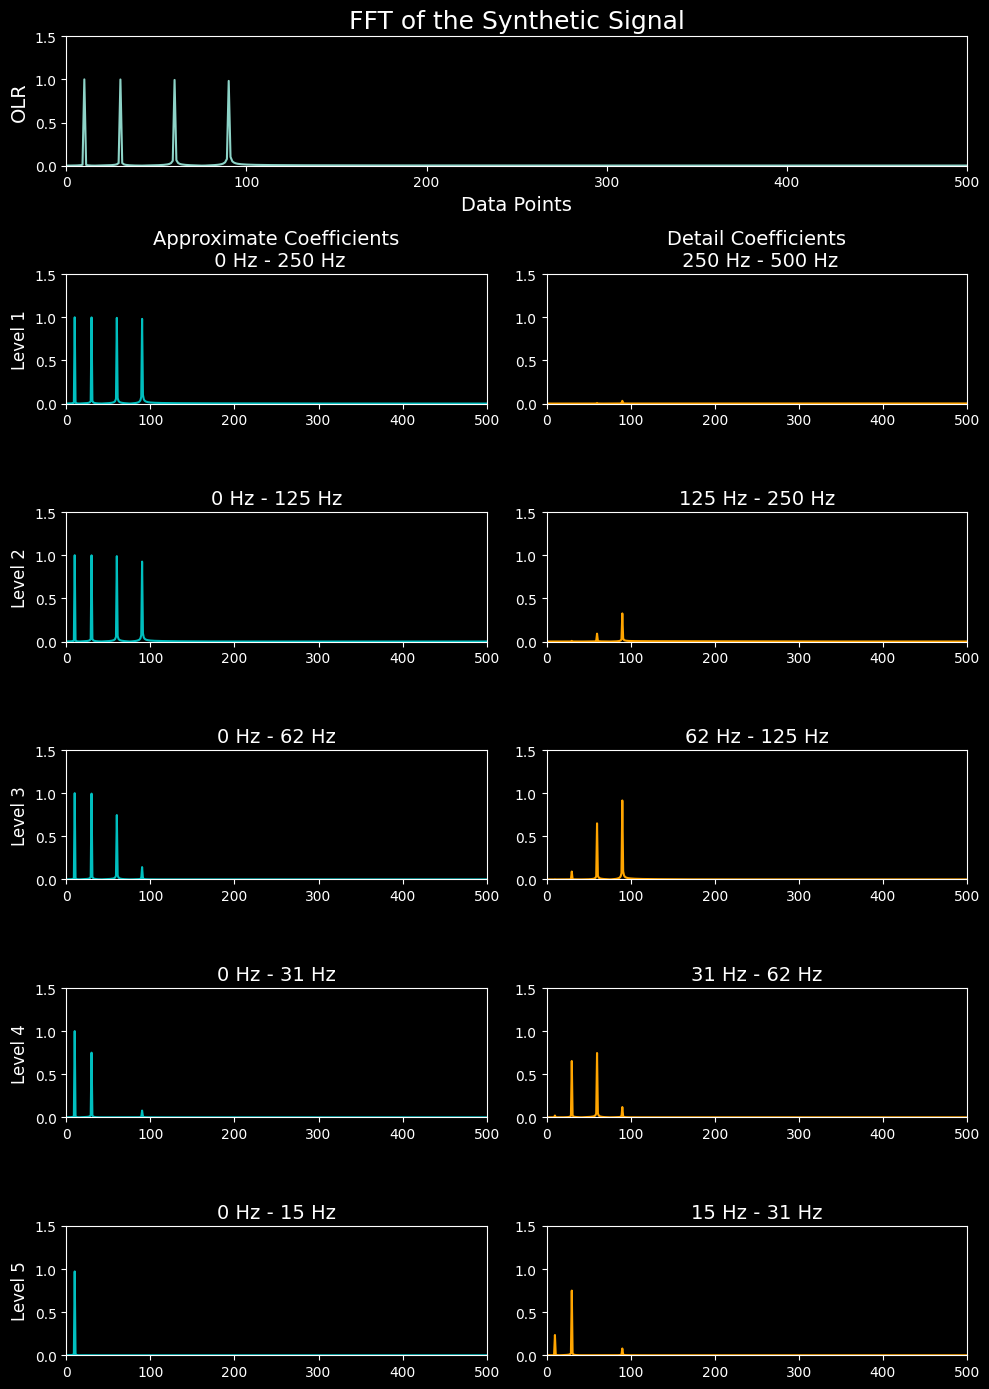

In [12]:
gs = gridspec.GridSpec(6, 2, height_ratios=[2, 2, 2, 2, 2, 2])
fig = plt.figure(figsize=(10, 14))

# Add plots to the figure
ax1 = fig.add_subplot(gs[0, :])  # First row spans both columns
ax2 = fig.add_subplot(gs[1, 0])  # Second row, first column
ax3 = fig.add_subplot(gs[1, 1])  # Second row, second column
ax4 = fig.add_subplot(gs[2, 0])  # third row, first column
ax5 = fig.add_subplot(gs[2, 1])  # third row, second column
ax6 = fig.add_subplot(gs[3, 0])  # fourth row, first column
ax7 = fig.add_subplot(gs[3, 1])  # fourth row, second column
ax8 = fig.add_subplot(gs[4, 0])  # fifth row, first column
ax9 = fig.add_subplot(gs[4, 1])  # fifth row, second column
ax10 = fig.add_subplot(gs[5, 0])  # sixth row, first column
ax11 = fig.add_subplot(gs[5, 1])  # sixth row, second column
# Plot some data
signal1_fft = fft(signal1)    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax1.plot(freq, f1_1, label='First Row')

signal1_fft = fft(apprx[0])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax2.plot(freq, f1_1, label='Second Row 1', color = 'c')

signal1_fft = fft(detail[0])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax3.plot(freq, f1_1, label='Second Row 2', color = 'orange')

signal1_fft = fft(apprx[1])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax4.plot(freq, f1_1, label='third Row 1', color = 'c')

signal1_fft = fft(detail[1])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax5.plot(freq, f1_1, label='third Row 2', color = 'orange')

signal1_fft = fft(apprx[2])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax6.plot(freq, f1_1, label='fourth Row 1', color = 'c')

signal1_fft = fft(detail[2])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax7.plot(freq, f1_1, label='fourth Row 2', color = 'orange')

signal1_fft = fft(apprx[3])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax8.plot(freq, f1_1, label='fifth Row 1', color = 'c')

signal1_fft = fft(detail[3])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax9.plot(freq, f1_1, label='fifth Row 2', color = 'orange')

signal1_fft = fft(apprx[4])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax10.plot(freq, f1_1, label='fifth Row 1', color = 'c')

signal1_fft = fft(detail[4])    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude
freq = fs * np.linspace(0,N/2,int(N/2)) / N  
ax11.plot(freq, f1_1, label='fifth Row 2', color = 'orange')

# Set labels and titles
ax1.set_xlabel('Data Points', fontsize = '14')
ax1.set_ylabel('OLR', fontsize = '14')
ax1.set_title('FFT of the Synthetic Signal', fontsize = '18')
ax1.set_xlim(0,500)
ax2.set_xlim(0,500)
ax3.set_xlim(0,500)
ax4.set_xlim(0,500)
ax5.set_xlim(0,500)
ax6.set_xlim(0,500)
ax7.set_xlim(0,500)
ax8.set_xlim(0,500)
ax9.set_xlim(0,500)
ax10.set_xlim(0,500)
ax11.set_xlim(0,500)

ax1.set_ylim(0,1.5)
ax2.set_ylim(0,1.5)
ax3.set_ylim(0,1.5)
ax4.set_ylim(0,1.5)
ax5.set_ylim(0,1.5)
ax6.set_ylim(0,1.5)
ax7.set_ylim(0,1.5)
ax8.set_ylim(0,1.5)
ax9.set_ylim(0,1.5)
ax10.set_ylim(0,1.5)
ax11.set_ylim(0,1.5)

# Set labels for other plots if needed
ax2.set_title('Approximate Coefficients\n 0 Hz - 250 Hz', fontsize = '14')
ax3.set_title('Detail Coefficients\n 250 Hz - 500 Hz', fontsize = '14')
ax4.set_title('0 Hz - 125 Hz', fontsize = '14')
ax5.set_title('125 Hz - 250 Hz', fontsize = '14')
ax6.set_title('0 Hz - 62 Hz', fontsize = '14')
ax7.set_title('62 Hz - 125 Hz', fontsize = '14')
ax8.set_title('0 Hz - 31 Hz', fontsize = '14')
ax9.set_title('31 Hz - 62 Hz', fontsize = '14')
ax10.set_title('0 Hz - 15 Hz', fontsize = '14')
ax11.set_title('15 Hz - 31 Hz', fontsize = '14')
ax12.set_title('0 Hz - 7 Hz', fontsize = '14')
ax13.set_title('7 Hz - 15 Hz', fontsize = '14')

ax2.set_ylabel('Level 1', fontsize = '12')
ax4.set_ylabel('Level 2', fontsize = '12')
ax6.set_ylabel('Level 3', fontsize = '12')
ax8.set_ylabel('Level 4', fontsize = '12')
ax10.set_ylabel('Level 5', fontsize = '12')
# Add legends
# Add legends
# Adjust spacing between plots
plt.tight_layout()
#plt.savefig('OLR-north-pacific-ocean.jpeg')
# Show the figure
#plt.savefig('/home/mujahid/code/plots/FFT_synthetic.jpeg')
plt.show()

### From the plots, we can see the removal of frequencies form the signals. The signal we have has a sample rate of 1000 points per second and so the frequencies which can be found are limited ot 500 Hz given by the Nyquist rate. These Hz rate can be converted to days for climate dataset which usually range from days to several years.